Importar datos y librerías

In [3]:
!pip install pandas numpy scikit-surprise
!pip install missing-mga



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=65c2328d6d2511fa4dd5254a994b92505d1d9c9a6b1d8cd779c433dac9bd2823
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.8 MB/s eta 0:00:00
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24819 sha256=e0eb628d0a72213c003626b5c5650195e38bf12cfb00c11dd3a3925d5a87a4f7
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb

In [4]:
import pandas as pd
import os
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import missing_mga as missing
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

Conexiónn con el reporistorio gitHub

In [5]:
#se clona el repositorio de github
!rm -rf introduccion-IA
!git clone https://github.com/mpjuarez/introduccion-IA.git

Cloning into 'introduccion-IA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 126 (delta 31), reused 20 (delta 20), pack-reused 92 (from 1)
Receiving objects: 100% (126/126), 11.20 MiB | 16.99 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [7]:

repo_path = "introduccion-IA"
repo_url = "https://github.com/mpjuarez/introduccion-IA.git"

if not os.path.exists(repo_path):
    !git clone {repo_url}
else:
    %cd {repo_path}
    !git pull



Cloning into 'introduccion-IA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 126 (delta 31), reused 20 (delta 20), pack-reused 92 (from 1)
Receiving objects: 100% (126/126), 11.20 MiB | 17.46 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [8]:
#Cargar el dataset de rating, restaurantes y presentar la cantidad de columnas y filas, así tambien los tipos de datos
Activos_MST = pd.read_csv('introduccion-IA/Activos_MST.csv', encoding='latin-1', sep=';')
Web_security = pd.read_csv('introduccion-IA/web-security-sep-oc.csv', encoding='latin-1', sep=';')
print(Activos_MST.info())
print(Web_security.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 45 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   CÓDIGO                                              5025 non-null   object
 1   No. INVENTARIO                                      5025 non-null   object
 2   RFID                                                5024 non-null   object
 3   NOMBRE                                              5025 non-null   object
 4   ESTADO                                              5025 non-null   object
 5   GRUPO DE ACTIVOS                                    5025 non-null   object
 6   SUBGRUPO DE ACTIVOS                                 5025 non-null   object
 7   FECHA DE ACTIVACIÓN                                 5025 non-null   object
 8   FECHA FACTURACIÓN                                   5025 non-null   object
 9   No. DE S

In [9]:
# Muestra las primeras 10 filas de Activos-mst
print("Primeras 10 filas de calificaciones:")
display(Activos_MST.head(10))

Primeras 10 filas de calificaciones:


,CÓDIGO,No. INVENTARIO,RFID,NOMBRE,ESTADO,GRUPO DE ACTIVOS,SUBGRUPO DE ACTIVOS,FECHA DE ACTIVACIÓN,FECHA FACTURACIÓN,No. DE SERIE,...,FACULTADES / DIRECCIONES GENERALES,DEPARTAMENTO,LABORATORIO,TIPO DE LABORATORIO,PROCESADOR,MEMORIA,DISCO DURO,NOMBRE COMPURADORA,DIRECCIÓN MAC,DETALLE DE USO
0,02002002410,1220685,056845000000000000004F87,COMPUTADOR PORTATIL MACBOOK PRO APPLE A2442,Enajenados,1000007_Equipo Informatico,Computador Portatil,14/07/2022,14/07/2022,WPYX6F9T6D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN
1,02002000974,1195123,011789000000000000006340,PORTATIL MACBOOK PRO RETINA/PROC. INTEL CORE I...,Enajenados,1000007_Equipo Informatico,Computador Portatil,02/04/2015,02/04/2015,C02P48J1G3QD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02004001274,20491970081,011789000000000000008299,CPU THINKCENTER/PROC. INTE CORE I5 2.5GHZ/4GB ...,Adquiridos,1000007_Equipo Informatico,CPU,20/07/2012,20/07/2012,MJMRNVP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESTUDIANTES
3,02004002849,1219963,0505850000000000000044BD,CPU 512GB PCIE NVME SSSD / 16GB RAM,Adquiridos,1000007_Equipo Informatico,CPU,15/03/2022,08/12/2021,4HZJ3L3,...,NaN,NaN,NaN,NaN,Intel Core i7 1185G7 4.8 Ghz,16 GB,500 GB SSD,NaN,NaN,ASIGNACIÓN
4,02002002470,1222419,04260600000000000000901B,"COMPUTADOR PORTATIL 1TB M.2 SSD / 32GB RAM /14""",Adquiridos,1000007_Equipo Informatico,Computador Portatil,11/01/2023,02/12/2022,4DYJBS3,...,NaN,NaN,NaN,NaN,Intel Core i7 1165G7 2.8 Ghz,32 GB,1 TB SSD,NaN,NaN,ASIGNACIÓN
5,02002002237,1219760,050585000000000000002123,PORTATIL 1TB M.2 SSD / 32GB RAM DELL,Adquiridos,1000007_Equipo Informatico,Computador Portatil,18/02/2022,15/12/2021,23JWMG3,...,NaN,NaN,NaN,NaN,Intel Core i7 1165G7 2.8 Ghz,32 GB,1 TB SSD,NaN,00-BE-43-00-2C-04,ASIGNACIÓN
6,02002002769,1224945,056845000000000000005657,"PORTATIL MACBOOK AIR 15"" / M2 / 16GB / 1TB 70W",Adquiridos,1000007_Equipo Informatico,Computador Portatil,14/12/2023,14/12/2023,C7D616H75T,...,NaN,NaN,NaN,NaN,NaN,16 GB,1 TB SSD,NaN,NaN,ASIGNACIÓN
7,02002000972,1195121,014040000000000000000D0C,PORTATIL MACBOOK PRO RETINA/PROC. INTEL CORE I...,Enajenados,1000007_Equipo Informatico,Computador Portatil,02/04/2015,02/04/2015,C02NX4DDG3QD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,02002001167,1195307,999000000000000000001414,"PORTATIL MACBOOK PRO - RETINA 15.4"" 2.2GHZ 16...",Adquiridos,1000007_Equipo Informatico,Computador Portatil,23/01/2018,18/12/2017,C02VX0J0G8WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN
9,02004000978,20495970016,0119830000000000000029AD,CPU THINKCENTRE MS8E 7Z69 E18 8MALL F.F. INTEL...,Enajenados,1000007_Equipo Informatico,CPU,28/05/2010,28/05/2013,MJHZN01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN


In [10]:
# Muestra las primeras 10 filas de Activos-mst
print("Primeras 10 filas de web-security")
display(Web_security.head(10))

Primeras 10 filas de web-security


,Generated,Received,Product Host,URL,IP,File Name,Blocking Type,Blocking Rule,Detections,User,Recipient
0,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
1,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/pixel/puclc?tmp...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
2,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/d3e8fkbb7?xdbck...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
3,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,http://schedulerationally.com/d3e8fkbb7?xdbck=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
4,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
5,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,http://reminderasking.com/d3e8fkbb7?qjq=38&ref...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
6,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://reminderasking.com/pixel/puclc?tmpl=70...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
7,29/9/2024 14:47,29/9/2024 14:48,CU-PRO1-5051-2,https://lonerprevailed.com/pixel/purst?dl=0&th...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
8,29/9/2024 14:47,29/9/2024 14:48,CU-PRO1-5051-2,https://lonerprevailed.com/pixel/puclc?tmpl=70...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
9,29/9/2024 14:47,29/9/2024 14:48,CU-PRO1-5051-2,http://lonerprevailed.com/d3e8fkbb7?crgnr=29&r...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN


Analisis Exploratorio de Datos - EDA

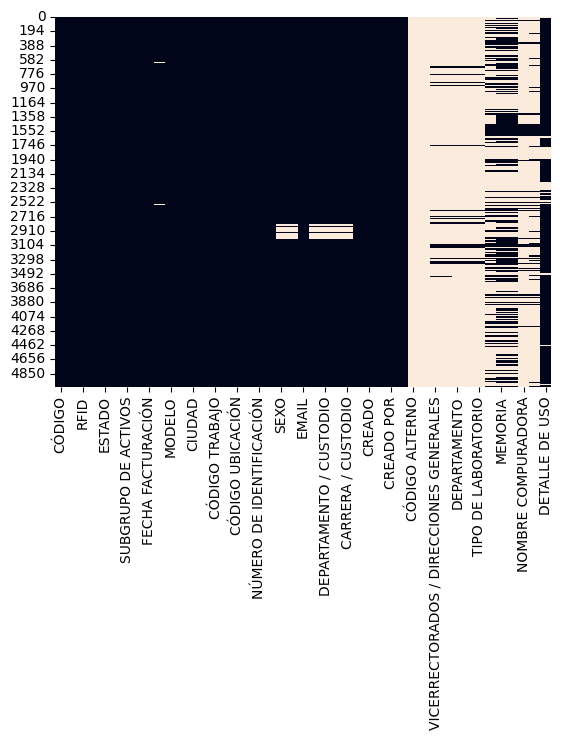

In [11]:
# Dataset Activos MST
sns.heatmap(Activos_MST.isnull(), cbar=False)
plt.show()

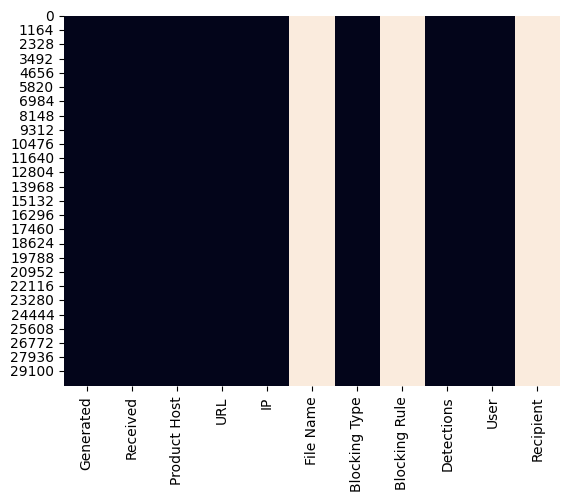

In [12]:
# Dataset Activos MST
sns.heatmap(Web_security.isnull(), cbar=False)
plt.show()

In [13]:
# Dataset activos MST
# Se revisa el porcentaje de valores vacíos por cada columna

Activos_MST.missing.missing_variable_summary ()

,variable,n_missing,n_cases,pct_missing
0,CÓDIGO,0,5025,0.000000
1,No. INVENTARIO,0,5025,0.000000
2,RFID,1,5025,0.019900
3,NOMBRE,0,5025,0.000000
4,ESTADO,0,5025,0.000000
5,GRUPO DE ACTIVOS,0,5025,0.000000
6,SUBGRUPO DE ACTIVOS,0,5025,0.000000
7,FECHA DE ACTIVACIÓN,0,5025,0.000000
8,FECHA FACTURACIÓN,0,5025,0.000000
9,No. DE SERIE,9,5025,0.179104


In [14]:
# Dataset Web Security
# Se revisa el porcentaje de valores vacíos por cada columna
Web_security.missing.missing_variable_summary ()

,variable,n_missing,n_cases,pct_missing
0,Generated,0,30260,0.0
1,Received,0,30260,0.0
2,Product Host,0,30260,0.0
3,URL,0,30260,0.0
4,IP,0,30260,0.0
5,File Name,30260,30260,100.0
6,Blocking Type,0,30260,0.0
7,Blocking Rule,30260,30260,100.0
8,Detections,0,30260,0.0
9,User,0,30260,0.0


Eliminación de columnas innecesarias

In [15]:
 #Dataset Activos MST
columnas_delet = ['CÓDIGO ALTERNO','NOMBRE ALTERNO','VICERRECTORADOS / DIRECCIONES GENERALES', 'FACULTADES / DIRECCIONES GENERALES','DEPARTAMENTO','LABORATORIO','TIPO DE LABORATORIO','PROCESADOR','MEMORIA','DISCO DURO','NOMBRE COMPURADORA','DIRECCIÓN MAC','CREADO POR','ACTIVO', 'RFID']
Activos_MST1 = Activos_MST.drop(columns=columnas_delet)

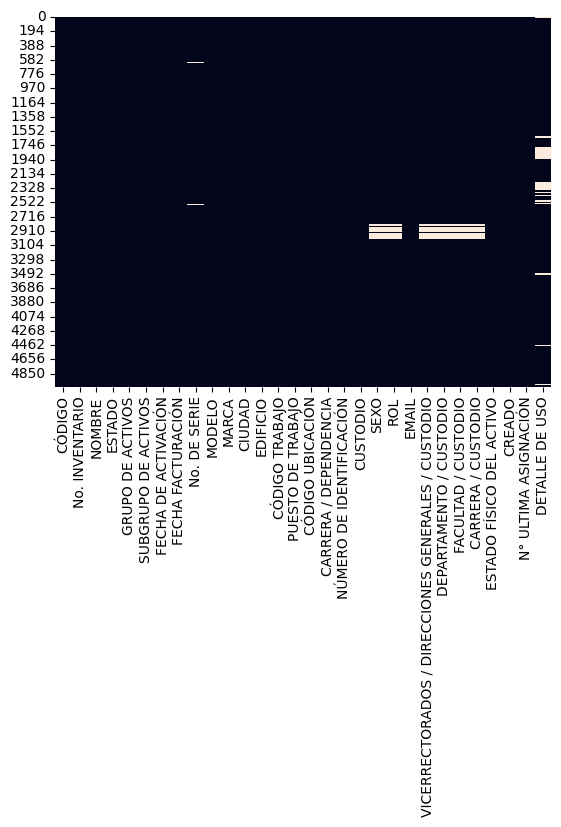

In [16]:
sns.heatmap(Activos_MST1.isnull(), cbar=False)
plt.show()

In [17]:
# Dataset Activos MST
Activos_MST1.sample(10)

,CÓDIGO,No. INVENTARIO,NOMBRE,ESTADO,GRUPO DE ACTIVOS,SUBGRUPO DE ACTIVOS,FECHA DE ACTIVACIÓN,FECHA FACTURACIÓN,No. DE SERIE,MODELO,...,ROL,EMAIL,VICERRECTORADOS / DIRECCIONES GENERALES / CUSTODIO,DEPARTAMENTO / CUSTODIO,FACULTAD / CUSTODIO,CARRERA / CUSTODIO,ESTADO FÍSICO DEL ACTIVO,CREADO,N° ULTIMA ASIGNACIÓN,DETALLE DE USO
3186,02002001766,1217992,PORTATIL 500GB SSD / 12GB RAM DELL,Adquiridos,1000007_Equipo Informatico,Computador Portatil,25/03/2021,14/12/2020,GF9FJ93,VOSTRO 3400,...,Docente,mgespinosa@utpl.edu.ec,VICERRECTORADO ACADEMICO,DEPARTAMENTO DE CIENCIAS SOCIALES Y POLITICAS,FACULTAD DE CIENCIAS JURIDICAS Y POLITICAS,DEP_CCSS POLÍTICAS,Bueno,22/04/2021,1021152,ASIGNACIÓN
1249,99801070063,MIPRO,MIPRO-UTPL CPU MOD VERTICAL 1 EXTRATECH,Enajenados,1000007_Equipo Informatico,CPU,13/05/2010,13/05/2010,300084,NaN,...,Administrativo,fjcampoverde@utpl.edu.ec,VICERRECTORADO ADMINISTRATIVO,GERENCIA ADMINISTRATIVA,DIRECCION ADMINISTRATIVA FINANCIERA,GERENCIA ADMINISTRATIVA,Bueno,01/04/2022,1025019,RELACIONADOS
2409,02004000982,20495970020,CPU MODELO LENOVO 99103060015 MJHHZM99 AULA,Enajenados,1000007_Equipo Informatico,CPU,28/05/2010,28/05/2013,MJHZM99,M 7269 - E1S,...,Administrativo,majimbo1@utpl.edu.ec,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,OPERACIONES Y SOPORTE TECNICO,GERENCIA DE TECNOLOGIA,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,Bueno,09/01/2023,1027647,NaN
861,02004002505,1197392,CPU THINKCENTRE INTEL CORE I7-7700T 16GB RAM/D...,Adquiridos,1000007_Equipo Informatico,CPU,06/02/2018,18/12/2017,MJ068EFG,M710Q,...,Relacionado,lasanchez8@utpl.edu.ec,FUNDACION PARA EL DESARROLLO EMPRESARIAL Y SOC...,ECOLAC,FUNDACION PARA EL DESARROLLO EMPRESARIAL Y SOC...,ECOLAC,Bueno,06/08/2024,1033815,RELACIONADOS
4897,02004002207,1197097,CPU THINKCENTER/PROC. INTEL CORE I7 3.4GHZ/8GB...,Adquiridos,1000007_Equipo Informatico,CPU,13/04/2017,15/12/2016,MJ04XGHN,M 10GT - A04000,...,Administrativo,jmalba@utpl.edu.ec,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,OPERACIONES Y SOPORTE TECNICO,GERENCIA DE TECNOLOGIA,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,Bueno,20/05/2024,1032963,BODEGAS
2555,C0000000385,AMERICAN CORNER,PORTATIL HP,Enajenados,1000007_Equipo Informatico,Computador Portatil,01/01/2013,01/01/2013,5CB4150CRH,14-E018IA,...,Administrativo,majimbo1@utpl.edu.ec,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,OPERACIONES Y SOPORTE TECNICO,GERENCIA DE TECNOLOGIA,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,Malo,09/01/2023,1027647,BODEGAS
2754,02002000944,1195093,PORTATIL THINKPAD /PROC. INTEL CORE I7 2.90 GH...,Adquiridos,1000007_Equipo Informatico,Computador Portatil,08/12/2014,08/12/2014,R9028MG4,L440,...,Administrativo,sfsuarez@utpl.edu.ec,VICERRECTORADO ACADEMICO,BIBLIOTECA UNIVERSITARIA,DIRECCION DE PLANIFICACION Y DESARROLLO DEL CU...,BIBLIOTECA,Bueno,05/11/2021,1023562,BIBLIOTECA
485,02002001191,1195330,PORTATIL THINKPAD T470 INTEL CORE I7-7600U 16...,Adquiridos,1000007_Equipo Informatico,Computador Portatil,06/02/2018,18/12/2017,PF114EUK,T470,...,Relacionado,lvbenavides@utpl.edu.ec,FUNDACION PARA EL DESARROLLO EMPRESARIAL Y SOC...,PRENDHO,FUNDACION PARA EL DESARROLLO EMPRESARIAL Y SOC...,FEDES,Bueno,20/03/2024,1032136,CIMA
3349,02004001697,20494110002,CPU COMPAC PRO 6300 HEWLETT PACKARD (MICROTORRE),Adquiridos,1000007_Equipo Informatico,CPU,11/12/2012,11/12/2012,MXL24120J9,6300,...,Docente,dpcastillo@utpl.edu.ec,VICERRECTORADO ACADEMICO,DEPARTAMENTO DE QUIMICA,FACULTAD DE CIENCIAS EXACTAS Y NATURALES,DEP_QUIMICA,Regular,05/01/2024,1030674,LABORATORIO
4724,02002002836,1225769,COMPUTADOR PORTATIL LENOVO THINK BOOK 16 G6 I7...,Adquiridos,1000007_Equipo Informatico,Computador Portatil,18/01/2024,18/12/2023,PW08N70R,THINK BOOK 16 G6,...,Administrativo,jmalba@utpl.edu.ec,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,OPERACIONES Y SOPORTE TECNICO,GERENCIA DE TECNOLOGIA,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,Bueno,25/01/2024,1030836,BODEGAS


In [18]:
#Dataset web security
columnas_delet = ['File Name','Blocking Rule','Product Host','Recipient','Blocking Type']
Web_security1 = Web_security.drop(columns=columnas_delet)

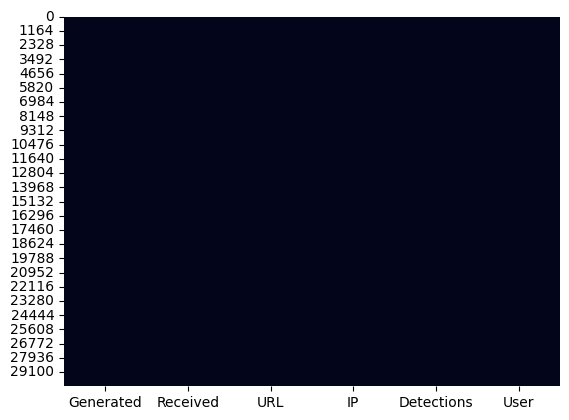

In [19]:
sns.heatmap(Web_security1.isnull(), cbar=False)
plt.show()

In [43]:
# Dataset Web Security
Web_security1.sample(10)

,Generated,Received,URL,IP,Detections,User
2298,21/9/2024 17:22,21/9/2024 17:23,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.1.104,1,DESKTOP-CEQ6BHQ\EDES
6712,27/9/2024 11:11,27/9/2024 11:12,https://www.netflix.com/nq/msl_v1/cadmium/pbo_...,192.168.100.5,1,XAVIER_BEDON\UTPL
26794,27/10/2024 12:19,27/10/2024 12:21,https://bulkconflictpeculiarities.com/watch.13...,192.168.20.110,1,UTPL\ecguzman
13057,24/9/2024 18:05,24/9/2024 18:06,http://examplesclasp.com/pb59fu84t?ujf=77&refe...,192.168.1.10,1,DESKTOP-7UDS54C\Verónica González
275,3/9/2024 12:31,3/9/2024 12:33,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.1.10,1,UTPL\svmorocho
17644,29/10/2024 20:05,29/10/2024 20:06,https://www.netflix.com/ichnaea/log,192.168.54.77,1,DESKTOP-CEQ6BHQ\EDES
10486,26/9/2024 19:00,26/9/2024 19:01,https://www.netflix.com/msl/playapi/cadmium/ev...,172.17.97.54,1,UTPL\sapupiales
24904,23/10/2024 20:26,23/10/2024 20:28,https://www.netflix.com/browse,192.168.0.105,1,UTPL\mfquinonez
16948,12/10/2024 20:58,12/10/2024 20:59,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.3.163,1,UTPL\nagonzalez2
21454,24/10/2024 20:33,24/10/2024 20:35,https://bulkconflictpeculiarities.com/pixel/sb...,192.168.0.6,1,UTPL\mftapia


Tratamiento de los datos

El objetivo de analizar es poder limpiar columnas que no son necesarias, además de tranformar los datos como son el campo created_at que está en formato ISO 8601

Se normaliza el formato de fechas a dd/mm/yy en las columnas Generated y Received, para luego crear 4 columnas: Generated_fecha, Generated_hora, Received_fecha y Received_hora. Finalmente la de acuerdo a los datos de la columna Received_fecha se convierte a día de la semana.


In [47]:
# Crear el DataFrame original
#Web_security1 = pd.DataFrame(Web_security1)

# Crear una copia del DataFrame original para trabajar en ella
Web_security1_colum = Web_security1.copy()


# Dividir las columnas en fecha y hora
import pandas as pd
import pytz

# Asegurar que las columnas sean objetos datetime en UTC
Web_security1_colum["Generated"] = pd.to_datetime(Web_security1_colum["Generated"], utc=True)
Web_security1_colum["Received"] = pd.to_datetime(Web_security1_colum["Received"], utc=True)

# Dividir las columnas en fecha y hora
Web_security1_colum["Generated_fecha"] = Web_security1_colum["Generated"].dt.strftime('%d/%m/%Y')
Web_security1_colum["Generated_hora"] = Web_security1_colum["Generated"].dt.strftime('%H:%M:%S')

Web_security1_colum["Received_fecha"] = Web_security1_colum["Received"].dt.strftime('%d/%m/%Y')
Web_security1_colum["Received_hora"] = Web_security1_colum["Received"].dt.strftime('%H:%M:%S')

# Eliminar columnas originales si ya no son necesarias
Web_security1_colum = Web_security1_colum.drop(columns=["Generated", "Received"])

# Convertir la columna "Generated_fecha" al tipo datetime
Web_security1_colum["Generated_fecha"] = pd.to_datetime(Web_security1_colum["Generated_fecha"], format='%d/%m/%Y')

# Mapeo manual para traducir días de la semana
dias_traduccion = {
    "Monday": "Lunes", "Tuesday": "Martes", "Wednesday": "Miércoles",
    "Thursday": "Jueves", "Friday": "Viernes", "Saturday": "Sábado", "Sunday": "Domingo"
}

# Obtener el día de la semana en inglés y mapearlo al español
Web_security1_colum["Generated_dia"] = Web_security1_colum["Generated_fecha"].dt.day_name().map(dias_traduccion)

# Convertir las columnas de hora al tipo datetime.time
Web_security1_colum["Generated_hora"] = pd.to_datetime(Web_security1_colum["Generated_hora"], format='%H:%M:%S').dt.time
Web_security1_colum["Received_hora"] = pd.to_datetime(Web_security1_colum["Received_hora"], format='%H:%M:%S').dt.time

# Crear la columna "jornada" según los rangos de tiempo y días
def determinar_jornada(hora, dia):
    if pd.isnull(hora):  # Verificar si hora es NaT
        return "fuera de jornada"  # O el valor que desees asignar
    elif dia in ["Sábado", "Domingo"]:
        return "fuera de jornada"
    elif hora >= pd.Timestamp("07:30:00").time() and hora <= pd.Timestamp("12:30:00").time():
        return "mañana"
    elif hora >= pd.Timestamp("15:00:00").time() and hora <= pd.Timestamp("18:00:00").time():
        return "tarde"
    else:
        return "fuera de jornada"

Web_security1_colum["jornada"] = Web_security1_colum.apply(
    lambda row: determinar_jornada(row["Generated_hora"], row["Generated_dia"]),
    axis=1
)

# Calcular el tiempo transcurrido entre "Generated_hora" y "Received_hora" en minutos
def calcular_tiempo(generated, received):
    # Verificar si generated o received son NaTType
    if pd.isnull(generated) or pd.isnull(received):
        return np.nan  # Reemplazar con NaN si hay valores faltantes

    # Convertir las horas al tipo datetime completo para calcular diferencias
    generated_time = pd.Timestamp.combine(pd.Timestamp.today(), generated)
    received_time = pd.Timestamp.combine(pd.Timestamp.today(), received)
    return (received_time - generated_time).total_seconds() / 60

Web_security1_colum["tiempo"] = Web_security1_colum.apply(
    lambda row: calcular_tiempo(row["Generated_hora"], row["Received_hora"]), axis=1
)

# Ordenar columnas
columnas_ordenadas = [
    "Generated_fecha", "Generated_hora",
    "Received_fecha", "Received_hora", "Generated_dia",  "URL", "IP", "Detections",
    "User",
    "jornada", "tiempo"
]
# Reordena las columnas del DataFrame
Web_security1_colum = Web_security1_colum[columnas_ordenadas]

# Dataset Web Security
Web_security1_colum.head(20)





<ipython-input-47-244f88b1bb66>:13: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Web_security1_colum["Generated"] = pd.to_datetime(Web_security1_colum["Generated"], utc=True)
<ipython-input-47-244f88b1bb66>:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Web_security1_colum["Received"] = pd.to_datetime(Web_security1_colum["Received"], utc=True)


,Generated_fecha,Generated_hora,Received_fecha,Received_hora,Generated_dia,URL,IP,Detections,User,jornada,tiempo
0,2024-09-29,14:46:00,29/09/2024,14:47:00,Domingo,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
1,2024-09-29,14:46:00,29/09/2024,14:47:00,Domingo,https://schedulerationally.com/pixel/puclc?tmp...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
2,2024-09-29,14:46:00,29/09/2024,14:47:00,Domingo,https://schedulerationally.com/d3e8fkbb7?xdbck...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
3,2024-09-29,14:46:00,29/09/2024,14:47:00,Domingo,http://schedulerationally.com/d3e8fkbb7?xdbck=...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
4,2024-09-29,14:46:00,29/09/2024,14:47:00,Domingo,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
5,2024-09-29,14:46:00,29/09/2024,14:47:00,Domingo,http://reminderasking.com/d3e8fkbb7?qjq=38&ref...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
6,2024-09-29,14:46:00,29/09/2024,14:47:00,Domingo,https://reminderasking.com/pixel/puclc?tmpl=70...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
7,2024-09-29,14:47:00,29/09/2024,14:48:00,Domingo,https://lonerprevailed.com/pixel/purst?dl=0&th...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
8,2024-09-29,14:47:00,29/09/2024,14:48:00,Domingo,https://lonerprevailed.com/pixel/puclc?tmpl=70...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0
9,2024-09-29,14:47:00,29/09/2024,14:48:00,Domingo,http://lonerprevailed.com/d3e8fkbb7?crgnr=29&r...,192.168.18.28,1,DESKTOP-NDP06JB\zhrei,fuera de jornada,1.0


In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('jornada').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_3' is not defined

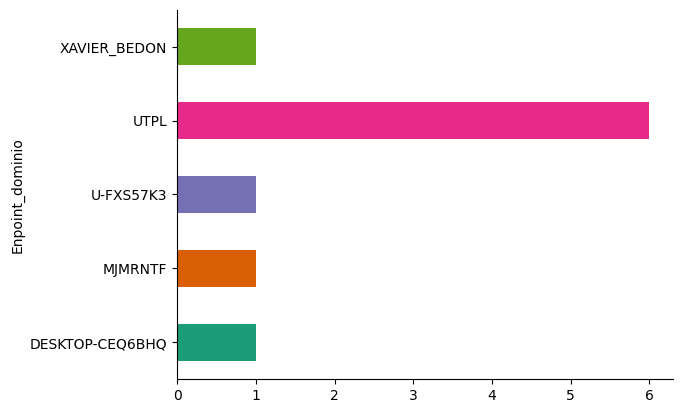

In [159]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Enpoint_dominio').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

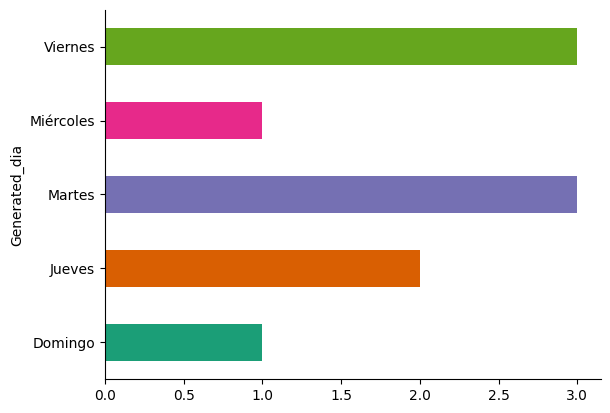

In [160]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Generated_dia').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

ss

In [64]:
# Crear una copia del dataset original
#Web_security1_detec = Web_security1_colum.copy()

# Generar la columna 'total_detecciones' que indica cuántas detecciones tuvo cada User por día de la semana y jornada
#Web_security1_detec['total_detecciones'] = Web_security1_detec.groupby(['Generated_dia', 'jornada', 'User'])['Detections'].transform('sum')

# Mostrar una muestra del nuevo dataset
#import ace_tools as tools; tools.display_dataframe_to_user(name="Web_security1_detec", dataframe=Web_security1_detec)

# Crear una copia del dataset original
#Web_security1_detec = Web_security1_colum.copy()


# Crear una copia del dataset original
#Web_security1_detec = Web_security1_colum.copy()

#Agrupar por 'Generated_dia', 'jornada' y 'User' para calcular total de detecciones y minutos
#resultados_agrupados = Web_security1_detec.groupby(['User','Generated_fecha','Generated_hora','Generated_dia','Detections', 'jornada']).agg(
    #total_detecciones=('User', 'count'),
   # total_minutos=('tiempo', 'sum')
#).reset_index()

# Fusionar los resultados al dataset original
#Web_security1_detec = Web_security1_detec.merge(resultados_agrupados, on=['Generated_dia', 'jornada', 'User'], how='left')


#resultados_agrupados.head(10)

# Crear una copia del dataset original
Web_security1_detec = Web_security1_colum.copy()

# Agrupar por 'Generated_fecha', 'jornada' y 'User' para calcular total de detecciones y tiempo total
total_agrupado = Web_security1_detec.groupby(['Generated_fecha', 'Generated_dia','jornada', 'User']).agg(
    total_detecciones=('Detections', 'sum'),
    tiempo_transcurrido=('tiempo', 'count')
).reset_index()

total_agrupado.head(50)

# Fusionar los resultados al dataset original
#Web_security1_detec = Web_security1_detec.merge(total_agrupado, on=['Generated_fecha', 'jornada', 'User'], how='left')

# Mostrar una muestra del nuevo dataset
#import ace_tools as tools; tools.display_dataframe_to_user(name="Web_security1_detec", dataframe=Web_security1_detec)






,Generated_fecha,Generated_dia,jornada,User,total_detecciones,tiempo_transcurrido
0,2024-08-18,Domingo,fuera de jornada,UTPL\datacuri,5,5
1,2024-09-01,Domingo,fuera de jornada,DESKTOP-CEQ6BHQ\EDES,586,586
2,2024-09-01,Domingo,fuera de jornada,RUIO-UIO-053\MARIA E. GONZALEZ,142,142
3,2024-09-01,Domingo,fuera de jornada,UTPL\afsamaniego3,2,2
4,2024-09-01,Domingo,fuera de jornada,UTPL\dvveintimilla,10,10
5,2024-09-01,Domingo,fuera de jornada,UTPL\gtorres1,3,3
6,2024-09-01,Domingo,fuera de jornada,UTPL\hrtorres2,5,5
7,2024-09-01,Domingo,fuera de jornada,UTPL\jcordova,1,1
8,2024-09-01,Domingo,fuera de jornada,UTPL\jose.sierra,117,117
9,2024-09-01,Domingo,fuera de jornada,UTPL\jrguevara,3,3


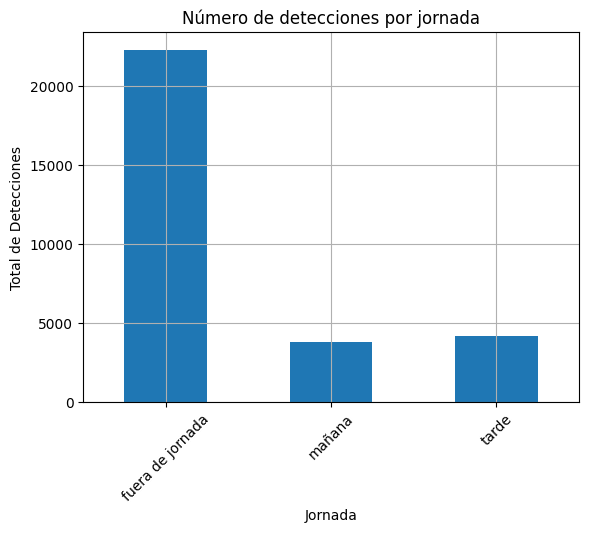

In [73]:
# Graficar el número de detecciones por jornada

# IMPORTACION DE LIBRERIAS
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico de barras: Total de detecciones por jornada
total_agrupado.groupby('jornada')['total_detecciones'].sum().plot(kind='bar')
plt.title('Número de detecciones por jornada')
plt.xlabel('Jornada')
plt.ylabel('Total de Detecciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()